In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# USA mass shooting dataset

================================================================================================

In [2]:
df=pd.read_csv(r"C:\Users\pc\Desktop\MY FILES\dataset\mass_shooting.csv", encoding="latin")
df.tail(3)

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
317,318,St. Aloysius Church,"Spokane, Washington",11/11/1971,"On November 11, 1971, a former MIT student ent...",2,4,5,Yes,White American or European American,Male,47.673674,-117.415984
318,319,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/1966,"On November 12, 1966, an 18-year-old high scho...",5,1,6,Yes,White American or European American,Male,33.422687,-111.816320
319,320,University of Texas at Austin,"Austin, Texas",8/1/1966,"On August 1, 1966, a 25-year-old engineering s...",17,32,48,Yes,White American or European American,Male,30.198887,-97.844159


### dropping some columns

In [3]:
df.drop(columns=['S#','Latitude','Longitude'],  inplace=True)

In [4]:
df.sample(4)

,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender
162,Homes in Desoto and Dallas,"Dallas, Texas",8/7/2013,"On August 7, 2013, a 44-year old former specia...",4,4,8,Unknown,Black American or African American,Male
174,Clackamas Town Center,"Happy Valley, Oregon",12/11/2012,"On December 11, 2012, an unemployed 22-year ol...",3,1,3,No,Some other race,Male
98,"Grand 16 Theatre, Louisiana","Lafayette, Louisiana",7/23/2015,"On July 23, 2015, a shooting occurred at The G...",3,9,11,Yes,White American or European American,Male
194,Hartford Beer Distributor shooting,"Manchester, Connecticut",8/3/2010,"Omar S. Thornton, 34, shot up his Hartford Bee...",9,2,11,No,black,Male


================================================================================================

### cleaning the data

================================================================================================

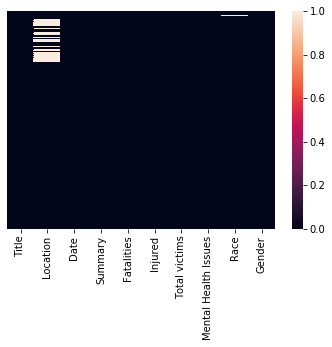

In [5]:
sns.heatmap(df.isna(), yticklabels=False)

In [6]:
df.isnull().sum()

Title                    0
Location                45
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     2
Gender                   0
dtype: int64

In [7]:
df['Scene']=df.Location.fillna(value="Unknown")

In [8]:
df.drop(columns='Location', inplace=True)

In [9]:
df.head(4)

,Title,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Scene
0,Las Vegas Strip mass shooting,10/1/2017,NaN,58,527,585,Unclear,White,M,"Las Vegas, NV"
1,San Francisco UPS shooting,6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,"San Francisco, CA"
2,Pennsylvania supermarket shooting,6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,"Tunkhannock, PA"
3,Florida awning manufacturer shooting,6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,"Orlando, Florida"


In [10]:
df.isna().sum()

Title                   0
Date                    0
Summary                 1
Fatalities              0
Injured                 0
Total victims           0
Mental Health Issues    0
Race                    2
Gender                  0
Scene                   0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Title                   0
Date                    0
Summary                 0
Fatalities              0
Injured                 0
Total victims           0
Mental Health Issues    0
Race                    0
Gender                  0
Scene                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 1 to 319
Data columns (total 10 columns):
Title                   317 non-null object
Date                    317 non-null object
Summary                 317 non-null object
Fatalities              317 non-null int64
Injured                 317 non-null int64
Total victims           317 non-null int64
Mental Health Issues    317 non-null object
Race                    317 non-null object
Gender                  317 non-null object
Scene                   317 non-null object
dtypes: int64(3), object(7)
memory usage: 27.2+ KB


In [14]:
df['Date_of_occurence']=pd.to_datetime(df.Date)

In [15]:
df.drop(columns='Date', inplace=True)

In [16]:
df.head()

,Title,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Scene,Date_of_occurence
1,San Francisco UPS shooting,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,"San Francisco, CA",2017-06-14
2,Pennsylvania supermarket shooting,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,"Tunkhannock, PA",2017-06-07
4,Rural Ohio nursing home shooting,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,"Kirkersville, Ohio",2017-05-12
5,Fresno downtown shooting,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Unclear,Black,M,"Fresno, California",2017-04-18
6,Fort Lauderdale airport shooting,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Yes,Latino,M,"Fort Lauderdale, Florida",2017-01-06


In [17]:
#df.to_csv('mass_shooting_cleaned')

================================================================================================

## Analysis

==============================================================================================

#### which location experienced the most shooting?

In [18]:
df.Scene.value_counts()

Unknown                    45
Seattle, Washington         5
Phoenix, Arizona            4
Killeen, Texas              4
Dallas, Texas               3
                           ..
Conway, Arkansas            1
Greenville, Georgia         1
West Paducah, Kentucky      1
Brookhaven, Mississippi     1
River Forest, Illinois      1
Name: Scene, Length: 222, dtype: int64

#### categorise perpetrators by gender

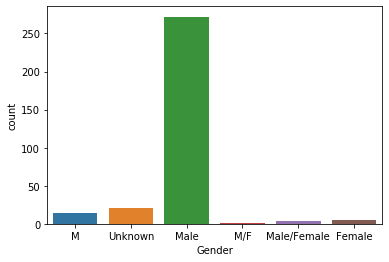

In [19]:
sns.countplot(df.Gender)

the genders were not properly recorded in the dataset. Notwithstanding, males appear to be highest perpetrator

#### from the dataset, which race is most prone to violence?

In [20]:
df.Race.value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    6
Asian                                                    6
Latino                                                   5
Black                                                    4
black                                                    3
Native American or Alaska Native                         3
Two or more races                                        2
Other                                                    2
Asian American/Some other race                           1
Black American or African American/Unknown               1
White American or European American/Some other Race     

## further cleaning

In [21]:
df.Race.replace('White American or European American','white', inplace=True)


In [22]:
df.replace('Black American or African American','black', inplace=True)
df.replace('White','white', inplace=True)
df.replace('Black','black', inplace=True)
df.replace('Native American or Alaska Native','white', inplace=True)
df.replace('White American or European American/Some other Race','white', inplace=True)
df.replace('Asian American','Asian', inplace=True)
df.replace('Asian American/Some other race','Asian', inplace=True)
df.replace('Black American or African American/Unknown','black', inplace=True)
df.replace('Two or more races','Other', inplace=True)
df.replace('Some other race','Other', inplace=True)

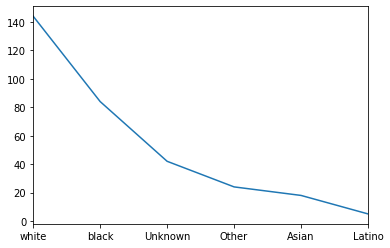

In [23]:
df.Race.value_counts().plot()

graph showing shooting by ethnicity

### Create a time stamp of both the fatalities and injuries

In [24]:
df['Year']=df.Date_of_occurence.dt.year

In [25]:
df.tail()

,Title,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Scene,Date_of_occurence,Year
315,Clara Barton Elementary School,"On January 17, 1974, a 14-year-old student ent...",1,3,4,Yes,Unknown,Male,"Chicago, Illinois",1974-01-17,1974
316,New Orleans Police Shootings,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,Yes,black,Male,"New Orleans, Louisiana",1972-12-31,1972
317,St. Aloysius Church,"On November 11, 1971, a former MIT student ent...",2,4,5,Yes,white,Male,"Spokane, Washington",1971-11-11,1971
318,Rose-Mar College of Beauty,"On November 12, 1966, an 18-year-old high scho...",5,1,6,Yes,white,Male,"Mesa, Arizona",1966-11-12,1966
319,University of Texas at Austin,"On August 1, 1966, a 25-year-old engineering s...",17,32,48,Yes,white,Male,"Austin, Texas",1966-08-01,1966


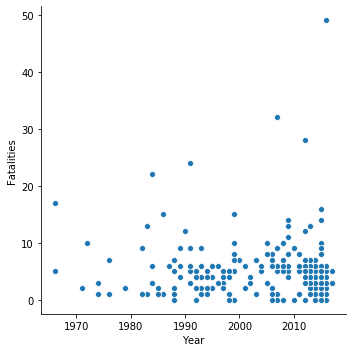

In [26]:
sns.relplot(y='Fatalities', x='Year', data= df)

Fatality: The time series graph above has not only shown that fatality has increased over the years, but also,
the number of occurence of mass shooting as well.

### What are the factors responsible for these crimes?

In [27]:
df.columns

Index(['Title', 'Summary', 'Fatalities', 'Injured', 'Total victims',
       'Mental Health Issues', 'Race', 'Gender', 'Scene', 'Date_of_occurence',
       'Year'],
      dtype='object')

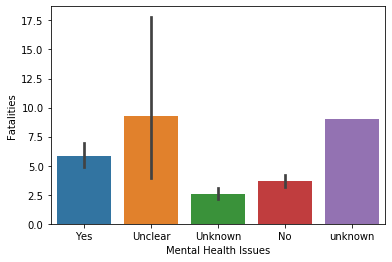

In [36]:
sns.barplot(x= 'Mental Health Issues', y= 'Fatalities', data=df)

### further cleaning

In [52]:
mental=df['Mental Health Issues'].replace('Unknown', 'unknown')
df['mental_health']=mental.replace('Unclear', 'unknown')

In [53]:
df.head()

,Title,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Scene,Date_of_occurence,Year,mental_health
1,San Francisco UPS shooting,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,"San Francisco, CA",2017-06-14,2017,Yes
2,Pennsylvania supermarket shooting,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,white,M,"Tunkhannock, PA",2017-06-07,2017,unknown
4,Rural Ohio nursing home shooting,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,white,M,"Kirkersville, Ohio",2017-05-12,2017,Yes
5,Fresno downtown shooting,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Unclear,black,M,"Fresno, California",2017-04-18,2017,unknown
6,Fort Lauderdale airport shooting,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Yes,Latino,M,"Fort Lauderdale, Florida",2017-01-06,2017,Yes


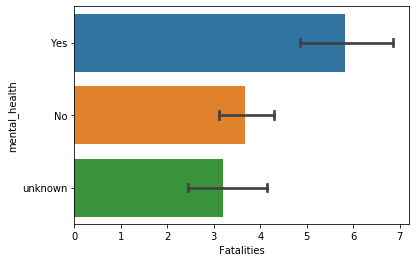

In [70]:
sns.barplot(y= 'mental_health', x= 'Fatalities', data=df, order= ['Yes','No', 'unknown'], capsize=0.1)

The dataset confirms that more people with mental health committed mass shooting crime than
those without.

In [83]:
round(df.groupby('mental_health')[['Fatalities','Injured', 'Total victims']].mean(),2)

,Fatalities,Injured,Total victims
mental_health,,,
No,3.68,3.27,6.59
Yes,5.82,6.34,11.76
unknown,3.20,3.98,6.86


The table above confirms that mental health is a significant factor contributing to mass shooting
crime in the United States. People with mental health killed and injured more people than people
without. 

In [95]:
df.Gender.value_counts()

Male           272
Unknown         21
M               14
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

Gender is a strong factor in these crimes. males are 98% more likely to commit these crimes 
than female.

================================================================================================

### what month of the year were you likely to get shot in the US?

In [84]:
df.columns

Index(['Title', 'Summary', 'Fatalities', 'Injured', 'Total victims',
       'Mental Health Issues', 'Race', 'Gender', 'Scene', 'Date_of_occurence',
       'Year', 'mental_health'],
      dtype='object')

In [86]:
df['Month']=df.Date_of_occurence.dt.month

In [87]:
df.sample(3)

,Title,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Scene,Date_of_occurence,Year,mental_health,Month
129,Charlotte,"On February 24, 2015, ""America's Next Top Mode...",3,0,3,No,Other,Male,"Charlotte, North Carolina",2015-02-24,2015,No,2
100,"Amnicola Training Center, Chattanooga",Four Marines were shot dead Thursday after a g...,5,3,7,Yes,white,Male,"Chattanooga, Tennessee",2015-07-16,2015,Yes,7
224,Essex Elementary School,"On August 24, 2006, a 26-year old killed two p...",2,2,4,Yes,black,Male,"Essex Junction, Vermont",2006-08-24,2006,Yes,8


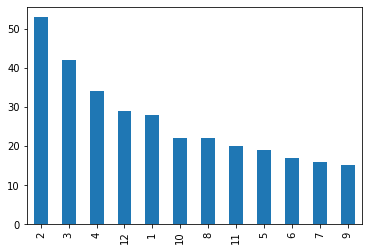

In [94]:
df.Month.value_counts().plot(kind='bar')

You are most likely get shot in US in the month of February